# Risky Business

This activity will involve calculating daily return data, standard deviation, annualized standard deviation, and Sharpe ratios as you analyze the risk and return metrics of each cryptocurrency in the portfolio.

Instructions:

1. Import the required libraries and dependencies.

2. Using the `read_csv` function and the `Path` module, read the `crypto_portfolio.csv` file into a Pandas DataFrame. Be sure to set a `DateTimeIndex`. Review the DataFrame by using both the `head` and the `tail` function.

3. Using the Pandas `pct_change` function together with `dropna`, calculate the daily returns for the cryptocurrency portfolio DataFrame.

4. Calculate the summary statistics for the DataFrame of cryptocurrency daily returns by calling the Pandas `describe` function.

5. Create a box plot that visualizes the spread of the daily return values for each cryptocurrency.

6. Answer the following question: based on the summary statistics and the box plot visualization, which cryptocurrency has the smallest spread and which has the largest?

7. Calculate the annualized average daily return values. Then use the Pandas `sort_values` function to sort the values from smallest to largest.

    > **Hint** To calculate the annualized average daily returns, multiply the mean for each cryptocurrency’s daily return value by the number of trading days in the year (252).

8. Calculate the annualized standard deviations for the DataFrame of cryptocurrency daily returns. Sort the values from smallest to largest.

    > **Hint** To calculate the annualized standard deviations, multiply the standard deviation of each cryptocurrency’s daily return value by the square root of the number of the number of trading days (`np.sqrt(252)`).

9. Calculate the Sharpe ratio for each cryptocurrency. Sort the Sharpe ratios from smallest to largest.

    > **Hint** To calculate the Sharpe ratio, divide the annualized average return by the annualized standard deviation.

10. Plot the Sharpe ratios in a bar chart.

11. Answer the following questions: Based on the risk and return metrics that you calculated, what cryptocurrency do you recommend that your firm invest in, and why? What’s your second choice?


References:

[Pandas std function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)

[NumPy sqrt function](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html)

[Pandas plot.bar function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)


## Step 1: Import the required libraries and dependencies.

In [4]:
# Import the Pandas library
import pandas as pd
# Import the NumPy library
import numpy as np

# Import the Path module from the Pathlib library
from pathlib import Path

# Import the %matplotlib inline dependency
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2: Using the `read_csv` function and the `Path` module, read the `crypto_portfolio.csv` file into a Pandas DataFrame. Be sure to set a `DateTimeIndex`. Review the DataFrame by using both the `head` and the `tail` function.

In [5]:
# Using the read_csv function and the Path module, read in the "crypto_portfolio.csv" file from the Resources folder
# Set the "Date" as the index column
# Be sure to set the DatetimeIndex using the parse_dates and infer_datetime_format parameters
crypto_portfolio_df = pd.read_csv(Path("../Resources/crypto_portfolio.csv"), index_col='Date', parse_dates=True, infer_datetime_format=True)

# Review the import by displaying both the head and tail functions
display(crypto_portfolio_df.head())
display(crypto_portfolio_df.tail())
    

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2016-08-24,582.58,0.000236,10.98,3.95,0.005932,0.001912
2016-08-25,578.92,0.000241,11.00,3.84,0.005912,0.001925
2016-08-26,576.16,0.000242,11.34,3.81,0.005892,0.001925
2016-08-27,578.89,0.000228,11.29,3.81,0.005902,0.001931
2016-08-28,570.42,0.000230,11.21,3.78,0.005869,0.002020


,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283
2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545


## Step 3: Using the Pandas `pct_change` function together with `dropna`, calculate the daily returns for the cryptocurrency portfolio DataFrame.

In [7]:
# Using the Pandas pct_change function in conjunction with the dropna function, create the crypto daily returns DataFrame
crypto_daily_returns = crypto_portfolio_df.pct_change().dropna()

# Review the first 5 rows of the crypto daily returns DataFrame 
crypto_daily_returns.head()


,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2016-08-25,-0.006282,0.021186,0.001821,-0.027848,-0.003372,0.006799
2016-08-26,-0.004767,0.004149,0.030909,-0.007812,-0.003383,0.000000
2016-08-27,0.004738,-0.057851,-0.004409,0.000000,0.001697,0.003117
2016-08-28,-0.014631,0.008772,-0.007086,-0.007874,-0.005591,0.046090
2016-08-29,0.007731,-0.013043,-0.020517,-0.015873,0.000170,0.005941


## Step 4: Calculate the summary statistics for the DataFrame of cryptocurrency daily returns by calling the Pandas `describe` function.

In [4]:
# Generate summary statistics for the crypto daily returns DataFrame using the Pandas describe function
crypto_daily_returns.describe()


,BTC,DOGE,ETH,LTC,XRP,XLM
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.003585,0.005190,0.005012,0.005511,0.008070,0.008669
std,0.042721,0.074504,0.060837,0.071647,0.099961,0.102069
min,-0.156905,-0.389127,-0.237338,-0.265049,-0.460047,-0.306745
25%,-0.012076,-0.023683,-0.023476,-0.026037,-0.024028,-0.035165
50%,0.002786,0.000000,0.000000,-0.002525,-0.003639,-0.003790
75%,0.021858,0.022422,0.029117,0.028355,0.022401,0.036348
max,0.272020,0.611579,0.325907,0.834884,1.793669,1.060816


## Step 5: Create a box plot that visualizes the spread of the daily return values for each cryptocurrency.

<AxesSubplot:>

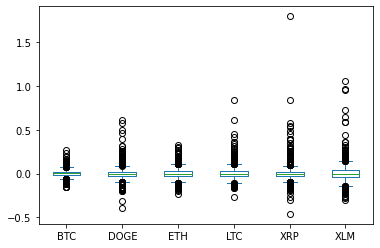

In [8]:
# Using the Pandas plot function with the kind paramater set to the value box, visualize the spread of the crypto daily returns DataFrame
crypto_daily_returns.plot(kind="box")


## Step 6: Answer the following question: based on the summary statistics and the box plot visualization, which cryptocurrency has the smallest spread and which has the largest?

**Question:** Based on the summary statistics and the box plot visualization, which of the cryptocurrencies has the smallest spread, and which has the largest?

**Answer:** BTC and XLM

## Step 7: Calculate the annualized average daily return values. Then use the Pandas `sort_values` function to sort the values from smallest to largest.

In [16]:
# The number of trading days is set to 252 for use throughout these calculations
trading_days = 252

# Calculate the annual average daily returns for the crypto currencies
# Use the Pandas mean function to calculate the average daily return for each cryptocurrency 
# Then multiply that value by the number of trading days in a year, using the trading_days variable set above 
annual_average_crypto_returns = crypto_daily_returns * trading_days

# Sort the annual average returns for the cryptocurrencies from lowest to highest
annual_average_crypto_returns.sort_values(by='BTC', ascending=True)
annual_average_crypto_returns


,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2016-08-25,-1.583165,5.338983,0.459016,-7.017722,-0.849629,1.713389
2016-08-26,-1.201410,1.045643,7.789091,-1.968750,-0.852503,0.000000
2016-08-27,1.194043,-14.578512,-1.111111,0.000000,0.427699,0.785455
2016-08-28,-3.687125,2.210526,-1.785651,-1.984252,-1.409014,11.614707
2016-08-29,1.948249,-3.286957,-5.170384,-4.000000,0.042937,1.497030
...,...,...,...,...,...,...
2019-05-16,6.698202,-10.665054,36.576159,29.050496,-20.059201,0.516868
2019-05-17,-9.964102,-16.386364,15.575422,-16.042636,-20.122438,-19.679727
2019-05-18,-16.480353,3.658339,-18.872121,-15.448982,-8.781008,4.521831


## Step 8: Calculate the annualized standard deviations for the DataFrame of cryptocurrency daily returns. Sort the values from smallest to largest.

In [25]:
# Calculate the annualized standard deviation for the cryptocurrencies
# Use the Pandas std function to calculate the standard deviation for each cryptocurrency
# Multiply the standard deviation by the square root (using the NumPy sqrt function) of the number of trading days
annual_standard_deviation = annual_average_crypto_returns * np.sqrt(252)

# Sort the annual standard deviations for the cryptocurrencies from lowest to highest
annual_standard_deviation.sort_values(by='BTC', ascending=True)
annual_standard_deviation


,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2016-08-25,-25.131958,84.753728,7.286659,-111.402875,-13.487444,27.199209
2016-08-26,-19.071785,16.599070,123.647985,-31.252937,-13.533072,0.000000
2016-08-27,18.954850,-231.426710,-17.638342,0.000000,6.789504,12.468704
2016-08-28,-58.531301,35.091017,-28.346331,-31.499023,-22.367402,184.377764
2016-08-29,30.927489,-52.178817,-82.077295,-63.498031,0.681611,23.764610
...,...,...,...,...,...,...
2019-05-16,106.330668,-169.302490,580.628523,461.162331,-318.429946,8.205031
2019-05-17,-158.175221,-260.125458,247.252154,-254.668958,-319.433797,-312.405985
2019-05-18,-261.617489,58.074331,-299.585629,-245.244982,-139.394188,71.781845


## Step 9: Calculate the Sharpe ratio for each cryptocurrency. Sort the Sharpe ratios from smallest to largest.

In [26]:
# Calculate Sharpe ratios by dividing the annual average return of the cryptocurrencies 
# by the annual standard deviation of the cryptocurrencies
crypto_sharpe_ratios = annual_average_crypto_returns/annual_standard_deviation

# Sort the Sharpe ratios for the cryptocurrencies from lowest to highest
crypto_sharpe_ratios.sort_values(by='BTC',ascending=True)


,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2016-08-25,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994
2018-02-22,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994
2018-02-23,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994
2018-02-26,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994
2018-03-02,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994
...,...,...,...,...,...,...
2018-05-28,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994
2017-10-21,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994
2018-05-25,0.062994,0.062994,0.062994,0.062994,0.062994,0.062994


## Step 10: Plot the Sharpe ratios in a bar chart.

<AxesSubplot:title={'center':'Crypto Sharpe_Ratios'}, xlabel='Date'>

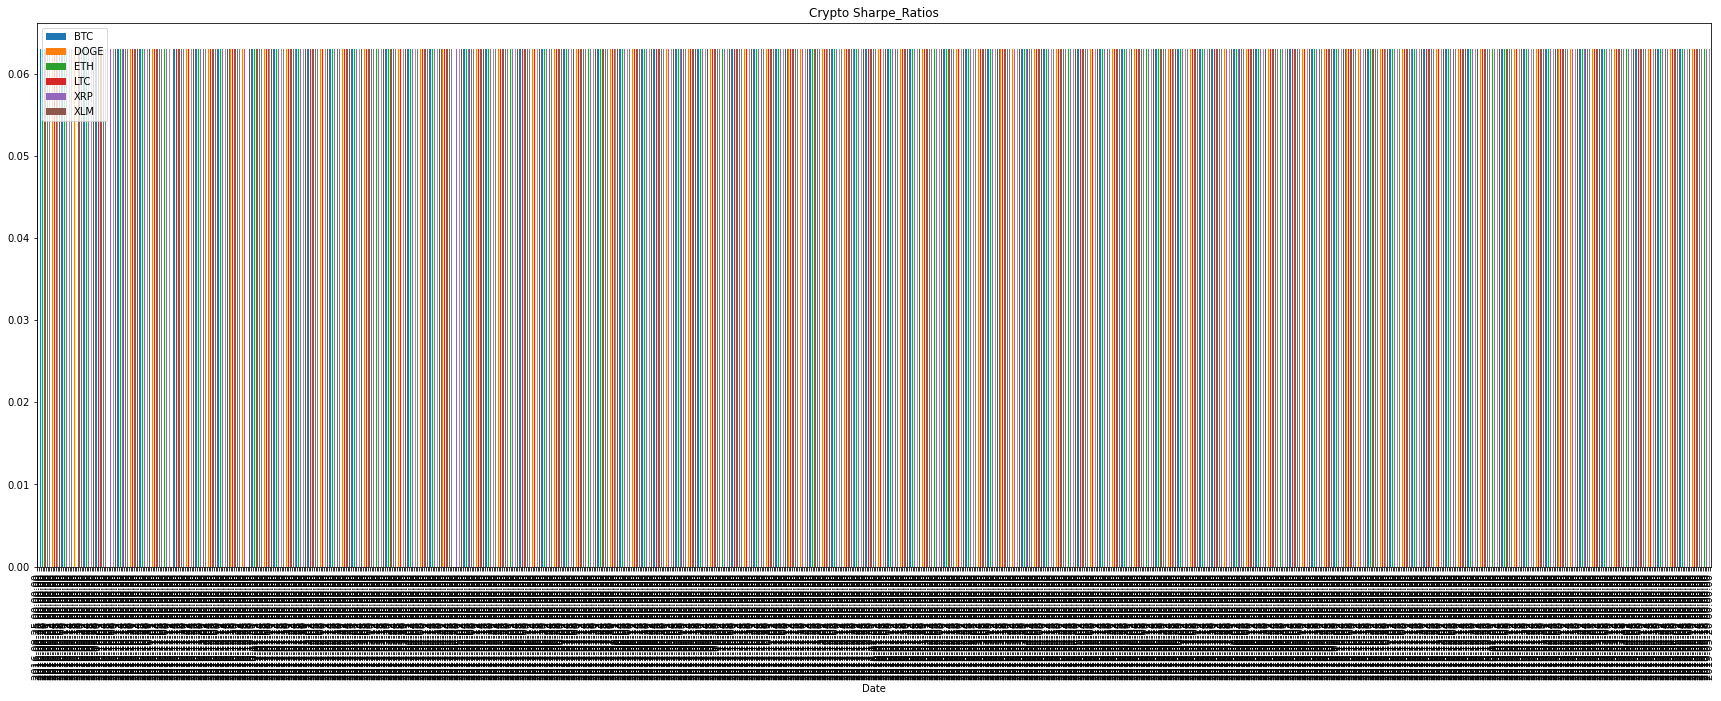

In [32]:
# Using the Pandas plot.bar function, visualize the Sharpe ratios for the cryptocurrencies in a bar chart
# Be sure to adjust the figure size and include a title
crypto_sharpe_ratios.plot.bar(figsize=(30,10), title='Crypto Sharpe_Ratios')


## Step 11: Answer the following questions: Based on the risk and return metrics that you calculated, what cryptocurrency do you recommend that your firm invest in, and why? What’s your second choice?

**Question:** Which cryptocurrency will you recommend for inclusion in your firm's portfolio,and why? What would be your second choice?

**Answer:** # YOUR ANSWER HERE